# NUPAT AI Fellowship Assessment

Analyze two datasets and deliver findings in a Jupyter Notebook.

## Data preparation and pre-processing

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the files

trade_df = pd.read_csv("trades.csv")
activity_df = pd.read_csv("user_activity.csv")

In [3]:
trade_df.head()

,pair,amount,volume,side,timestamp,user_id
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156
2,ADANGN,30653.12,17.100000,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100
3,ADANGN,1978.36,1.100000,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151
4,ADANGN,2913.62,1.600000,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151


In [4]:
activity_df.head()

,asset,amount,activity_type,timestamp,user_id
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154


In [5]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pair       2324 non-null   object 
 1   amount     2324 non-null   float64
 2   volume     2324 non-null   float64
 3   side       2324 non-null   object 
 4   timestamp  2324 non-null   object 
 5   user_id    2324 non-null   object 
dtypes: float64(2), object(4)
memory usage: 109.1+ KB


In [6]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asset          4845 non-null   object 
 1   amount         4845 non-null   float64
 2   activity_type  4845 non-null   object 
 3   timestamp      4845 non-null   object 
 4   user_id        4845 non-null   object 
dtypes: float64(1), object(4)
memory usage: 189.4+ KB


In [7]:
# convert timestamp for both dfs

trade_df["trade_time"] = pd.to_datetime(trade_df["timestamp"], errors = "coerce")
activity_df["activity_time"] = pd.to_datetime(activity_df["timestamp"], errors = "coerce")

## Part 1: Exploratory Data Analysis & Market Insights

1. Market Dynamics: What are the top 3 most traded pairs by total USD volume (use 1500
as the rate for all currency conversion to USD)?

Only the trade_df is involved here.
To get the total USD trade volume, multiply the amount with volume ane then divide the result by 1500 to convert to USD.
Then group the results by pairs, sort in descending order and filter to display only the top 3

In [8]:
# multply the amount with volume to get value
# divide the value by 1500 to convert to USD

trade_df["value"] = trade_df["amount"] * trade_df["volume"]
trade_df["value_USD"] = trade_df["value"] / 1500

trade_df.head()

,pair,amount,volume,side,timestamp,user_id,trade_time,value,value_USD
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148,2024-12-03 01:42:07.072672+00:00,0.611453,0.000408
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156,2024-12-02 11:29:56.860014+00:00,444.600000,0.296400
2,ADANGN,30653.12,17.100000,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100,2024-11-30 05:25:49.991660+00:00,524168.352000,349.445568
3,ADANGN,1978.36,1.100000,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151,2024-12-07 07:41:02.191598+00:00,2176.196000,1.450797
4,ADANGN,2913.62,1.600000,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151,2024-12-07 21:16:11.791118+00:00,4661.792000,3.107861


In [9]:
# aggregate total USD value/volume by pairs

top_trade_vol =(
    trade_df.groupby("pair")["value_USD"].sum().sort_values(ascending=False).head(3)
)

top_trade_vol = (top_trade_vol /1e9).round(2)           # rounding up the values to 2 decimal places and displaying as billion
top_trade_vol

,value_USD
pair,
BTTNGN,4.13
PEPENGN,0.10
USDTNGN,0.05


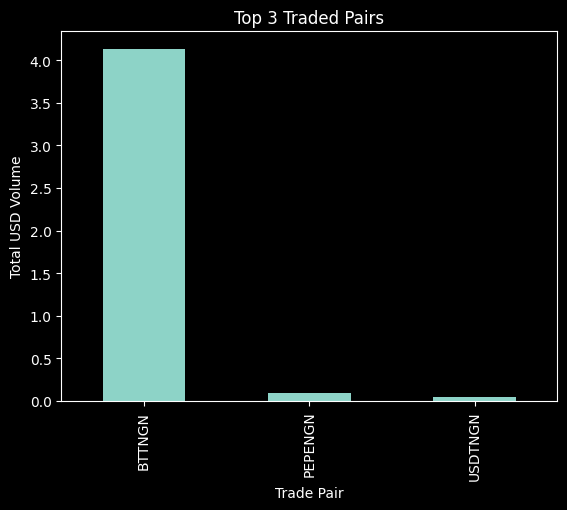

In [10]:
# visualize the output

plt.style.use("dark_background")
top_trade_vol.plot(kind = "bar")
plt.xlabel("Trade Pair")
plt.ylabel("Total USD Volume")
plt.title("Top 3 Traded Pairs")
plt.show()

The top 3 traded pairs are BTTNGN, PEPENGN, and USDTNGN with values of USD 4.13 billion, USD 0.10 billion, and USD 0.05 billion respectively.

2. Volatility Analysis: Calculate and plot the 7-day rolling average of daily price volatility for
the BTCNGN pair.



*   Filter the df to extract only BTCNGN
*   Extract the date, to allow easy aggregation by dates while calculating daily volatility.


*   Group trades that happened on the same day
*   Apply a function to each group that calculate daily volatility, create a rolling window of 7 days and then calculate the mean



*   daily volatilty = max amount - min amount






In [11]:
# filter the df for only btcngn

btcngn = trade_df[trade_df["pair"] == "BTCNGN"].copy()
btcngn.head()

,pair,amount,volume,side,timestamp,user_id,trade_time,value,value_USD
98,BTCNGN,4954.28,0.000033,sell,2024-12-04T12:08:08.522367Z,531-11001-1521-1571-198,2024-12-04 12:08:08.522367+00:00,0.162203,0.000108
99,BTCNGN,9896.29,0.000064,sell,2024-12-02T11:09:55.04264Z,531-11001-1521-1571-198,2024-12-02 11:09:55.042640+00:00,0.630493,0.000420
100,BTCNGN,70188.51,0.000445,sell,2024-11-28T16:06:43.218713Z,531-11001-1521-1571-198,2024-11-28 16:06:43.218713+00:00,31.221955,0.020815
101,BTCNGN,15000.31,0.000093,sell,2024-11-27T21:17:00.288607Z,531-11001-1521-1571-198,2024-11-27 21:17:00.288607+00:00,1.399229,0.000933
102,BTCNGN,2971.21,0.000019,sell,2024-12-10T13:39:00.08561Z,531-11001-1521-1571-198,2024-12-10 13:39:00.085610+00:00,0.057582,0.000038


In [12]:
# extracting the date

btcngn["date"] = btcngn["trade_time"].dt.date
btcngn.head()

,pair,amount,volume,side,timestamp,user_id,trade_time,value,value_USD,date
98,BTCNGN,4954.28,0.000033,sell,2024-12-04T12:08:08.522367Z,531-11001-1521-1571-198,2024-12-04 12:08:08.522367+00:00,0.162203,0.000108,2024-12-04
99,BTCNGN,9896.29,0.000064,sell,2024-12-02T11:09:55.04264Z,531-11001-1521-1571-198,2024-12-02 11:09:55.042640+00:00,0.630493,0.000420,2024-12-02
100,BTCNGN,70188.51,0.000445,sell,2024-11-28T16:06:43.218713Z,531-11001-1521-1571-198,2024-11-28 16:06:43.218713+00:00,31.221955,0.020815,2024-11-28
101,BTCNGN,15000.31,0.000093,sell,2024-11-27T21:17:00.288607Z,531-11001-1521-1571-198,2024-11-27 21:17:00.288607+00:00,1.399229,0.000933,2024-11-27
102,BTCNGN,2971.21,0.000019,sell,2024-12-10T13:39:00.08561Z,531-11001-1521-1571-198,2024-12-10 13:39:00.085610+00:00,0.057582,0.000038,2024-12-10


In [13]:
# function to calculate daily volatility

daily_vol = btcngn.groupby("date")["amount"].agg(lambda x: x.max()- x.min())

In [14]:
# rolling 7 day average

rolling_average = daily_vol.rolling(window = 7).mean()
rolling_average

,amount
date,
2024-11-27,NaN
2024-11-28,NaN
2024-11-29,NaN
2024-11-30,NaN
2024-12-01,NaN
2024-12-02,NaN
2024-12-03,4.019142e+06
2024-12-04,3.584876e+06
2024-12-05,3.789231e+06


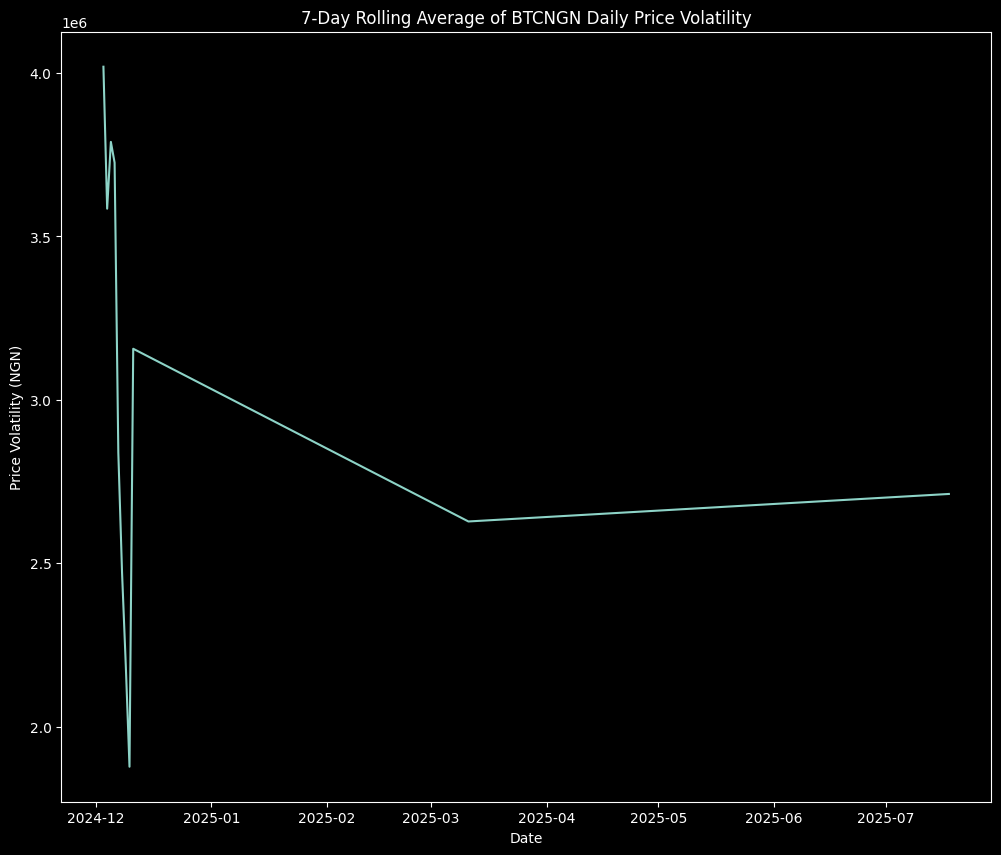

In [15]:
# plotting the average volatility

plt.style.use("dark_background")
plt.figure(figsize=(12,10))
plt.plot(rolling_average)
plt.title("7-Day Rolling Average of BTCNGN Daily Price Volatility")
plt.xlabel("Date")
plt.ylabel("Price Volatility (NGN)")
plt.show()

The BTCNGN was very volatile between December 2024 and January 2025, and kept on going down till March of 2025. It picked up again still in March of 2025 and has been increasing in a slow rate through July 2025.

3. User Behavior: Is there a specific day of the week or hour of the day when deposits are
highest? Visualize your findings to show these peak times.

Df: user_activity

Filter the df to get only deposits, extract day of the week and hour of the day, then count occurences of days and hours

In [16]:
# filter the user activity to extract a df for only deposits

deposits = activity_df[activity_df["activity_type"] == "deposit"].copy()
deposits.head()

,asset,amount,activity_type,timestamp,user_id,activity_time
2,NGN,131062.000000,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100,2025-01-17 14:37:56.853225+00:00
5,USDT,10.000000,deposit,2025-01-17T14:38:50.413408Z,481-11001-1521-1981-154,2025-01-17 14:38:50.413408+00:00
8,NGN,2000.000000,deposit,2025-01-17T14:39:45.669391Z,971-1531-1521-1981-153,2025-01-17 14:39:45.669391+00:00
11,SOL,0.009095,deposit,2025-01-17T14:42:06.457063Z,991-1511-1521-1561-198,2025-01-17 14:42:06.457063+00:00
12,SOL,0.101000,deposit,2025-01-17T14:42:16.360057Z,991-1541-1521-1971-153,2025-01-17 14:42:16.360057+00:00


In [17]:
# extract day of the week and hour of the day

deposits["day_of_week"] = deposits["activity_time"].dt.day_name()
deposits["hour_of_day"] = deposits["activity_time"].dt.hour

deposits.head()

,asset,amount,activity_type,timestamp,user_id,activity_time,day_of_week,hour_of_day
2,NGN,131062.000000,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100,2025-01-17 14:37:56.853225+00:00,Friday,14
5,USDT,10.000000,deposit,2025-01-17T14:38:50.413408Z,481-11001-1521-1981-154,2025-01-17 14:38:50.413408+00:00,Friday,14
8,NGN,2000.000000,deposit,2025-01-17T14:39:45.669391Z,971-1531-1521-1981-153,2025-01-17 14:39:45.669391+00:00,Friday,14
11,SOL,0.009095,deposit,2025-01-17T14:42:06.457063Z,991-1511-1521-1561-198,2025-01-17 14:42:06.457063+00:00,Friday,14
12,SOL,0.101000,deposit,2025-01-17T14:42:16.360057Z,991-1541-1521-1971-153,2025-01-17 14:42:16.360057+00:00,Friday,14


In [18]:
# day of week analysis
# count the occurence of each day of the week

day_deposit = deposits["day_of_week"].value_counts()
day_deposit

,count
day_of_week,
Friday,671
Saturday,544
Wednesday,378
Thursday,5
Monday,2
Sunday,1


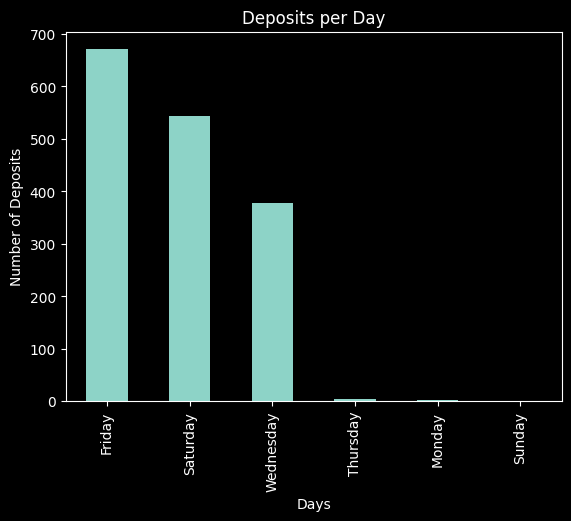

In [19]:
# plotting the deposits per day

plt.style.use("dark_background")
day_deposit.plot(kind = "bar")
plt.xlabel("Days")
plt.ylabel("Number of Deposits")
plt.title("Deposits per Day")
plt.show()

Deposits are highest on Fridays, which is the official last working day of the week.

In [20]:
# hourly analysis

hour_deposit = deposits["hour_of_day"].value_counts()
hour_deposit

,count
hour_of_day,
15,162
17,143
12,139
16,135
11,123
19,87
20,80
18,78
7,67


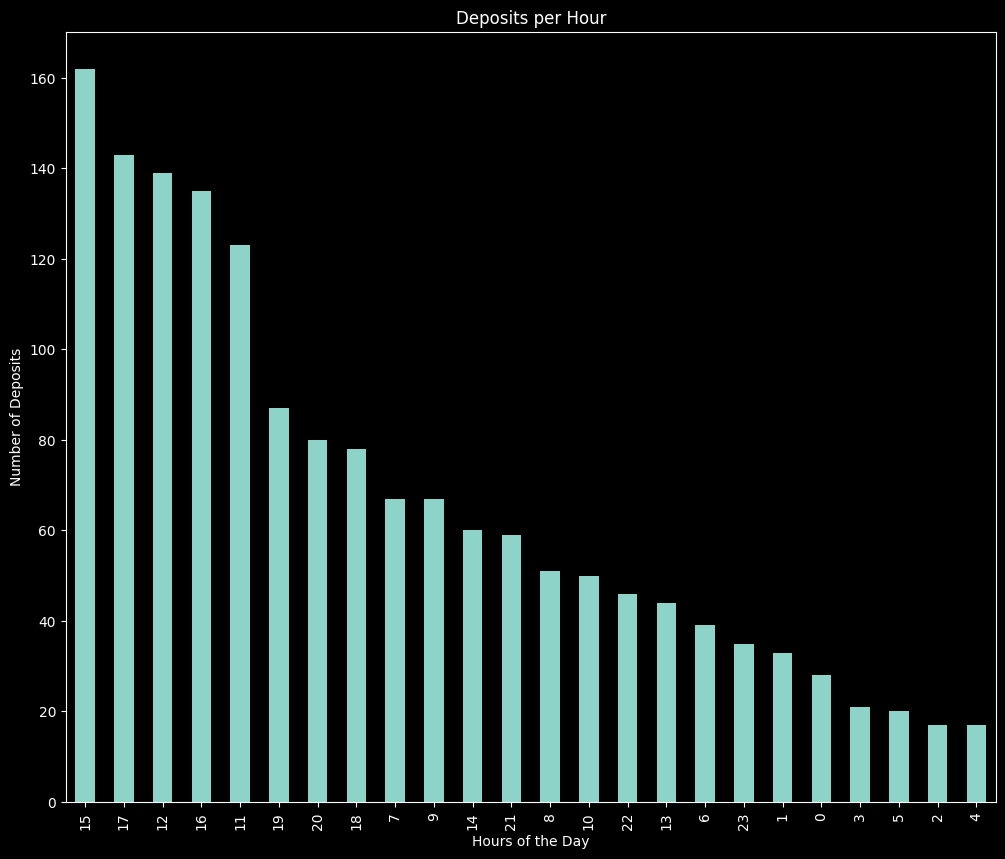

In [21]:
# plotitng the hourly deposits

plt.style.use("dark_background")
plt.figure(figsize = (12,10))
hour_deposit.plot(kind = "bar")
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Deposits")
plt.title("Deposits per Hour")
plt.show()

Deposits are usually at its peak at the 15th hour of the day.

## Part 2: Fraud Detection Model

A common fraudulent pattern involves
depositing funds, making minimal trades, and then quickly withdrawing everything. Build a model to identify users exhibiting this behavior.

1. Feature Engineering: Using both datasets, create features for each user_id. Examples
could include:

o Deposit/withdrawal frequency and ratio.

o Time between first deposit and first withdrawal.

o Trading volume vs. total deposited amount.

o Number of unique assets traded.

### Logic

Create features for each user_id (each dataset).

Merge the features into one dataset for modeling.

#### Create features for the user_activity

In [22]:
activity_df.head()

,asset,amount,activity_type,timestamp,user_id,activity_time
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101,2025-01-17 14:37:56.806446+00:00
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101,2025-01-17 14:37:56.818033+00:00
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100,2025-01-17 14:37:56.853225+00:00
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198,2025-01-17 17:05:18.201218+00:00
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154,2025-01-17 14:38:22.555744+00:00


In [23]:
# feature for deposit & withdrawal

activity_df["is_deposit"] = (activity_df["activity_type"] == "deposit").astype(int)
activity_df["is_withdrawal"] = (activity_df["activity_type"] == "withdrawal").astype(int)

activity_df.head()

,asset,amount,activity_type,timestamp,user_id,activity_time,is_deposit,is_withdrawal
0,NGN,131062.0,withdrawal,2025-01-17T14:37:56.806446Z,561-1561-1521-1981-1101,2025-01-17 14:37:56.806446+00:00,0,1
1,NGN,50000.0,withdrawal,2025-01-17T14:37:56.818033Z,971-11001-1521-1571-1101,2025-01-17 14:37:56.818033+00:00,0,1
2,NGN,131062.0,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100,2025-01-17 14:37:56.853225+00:00,1,0
3,NGN,20064.0,withdrawal,2025-01-17T17:05:18.201218Z,531-11001-1521-1571-198,2025-01-17 17:05:18.201218+00:00,0,1
4,NGN,2000.0,withdrawal,2025-01-17T14:38:22.555744Z,501-11021-1521-1561-154,2025-01-17 14:38:22.555744+00:00,0,1


In [24]:
# deposit and withdrwal frequency using aggregation
features_freq = (
    activity_df.groupby("user_id").agg(deposit_count = ("is_deposit", "sum"), withdrawal_count = ("is_withdrawal", "sum"))
    )

# deposit-withdrawal ratio
features_freq["ratio"] = features_freq["deposit_count"] / features_freq["withdrawal_count"].replace(0,1)    # .replace is used here to avoid zero-division

features_freq.head()

,deposit_count,withdrawal_count,ratio
user_id,,,
1001-11001-1521-1561-154,3,20,0.150000
1001-11001-1521-1571-155,1,1,1.000000
1001-11001-1521-1971-1102,1,1,1.000000
1001-11001-1521-1971-156,0,1,0.000000
1001-11001-1521-1981-156,7,6,1.166667


In [25]:
# feature for first deposit & withdrawal times

# derive first deposit time for each user
first_deposit = activity_df[activity_df["is_deposit"] == 1].groupby("user_id")["activity_time"].min()

# derive first withdrawal time for each user
first_withdrawal = activity_df[activity_df["is_withdrawal"] == 1].groupby("user_id")["activity_time"].min()

# combine both features into one table or df
time_feat = pd.concat([first_deposit, first_withdrawal], axis = 1)

# columns for the df
time_feat.columns = ["first_deposit", "first_withdrawal"]
time_feat.head()

,first_deposit,first_withdrawal
user_id,,
1001-11001-1521-1561-154,2025-01-17 17:38:26.189682+00:00,2025-01-17 14:56:53.191137+00:00
1001-11001-1521-1571-155,2025-03-12 15:08:57.744625+00:00,2025-03-12 15:31:47.549399+00:00
1001-11001-1521-1971-1102,2025-01-18 06:42:12.823378+00:00,2025-01-18 07:16:01.131864+00:00
1001-11001-1521-1981-156,2025-01-17 15:25:22.825389+00:00,2025-01-17 15:23:24.859884+00:00
1001-11001-1521-1981-157,2025-01-17 16:31:37.196442+00:00,2025-01-17 16:47:59.117039+00:00


In [26]:
# derive duration between first deposit and first withdrawal for each user

time_feat["deposit_withdrawal_duration"] = (time_feat["first_withdrawal"] - time_feat["first_deposit"]).dt.total_seconds() / 3600
time_feat.head()

,first_deposit,first_withdrawal,deposit_withdrawal_duration
user_id,,,
1001-11001-1521-1561-154,2025-01-17 17:38:26.189682+00:00,2025-01-17 14:56:53.191137+00:00,-2.692500
1001-11001-1521-1571-155,2025-03-12 15:08:57.744625+00:00,2025-03-12 15:31:47.549399+00:00,0.380501
1001-11001-1521-1971-1102,2025-01-18 06:42:12.823378+00:00,2025-01-18 07:16:01.131864+00:00,0.563419
1001-11001-1521-1981-156,2025-01-17 15:25:22.825389+00:00,2025-01-17 15:23:24.859884+00:00,-0.032768
1001-11001-1521-1981-157,2025-01-17 16:31:37.196442+00:00,2025-01-17 16:47:59.117039+00:00,0.272756


In [27]:
# merge the features of the user_acitivity into one table

activity_feat = features_freq.merge(time_feat, on = "user_id", how = "left")
activity_feat.head()

,deposit_count,withdrawal_count,ratio,first_deposit,first_withdrawal,deposit_withdrawal_duration
user_id,,,,,,
1001-11001-1521-1561-154,3,20,0.150000,2025-01-17 17:38:26.189682+00:00,2025-01-17 14:56:53.191137+00:00,-2.692500
1001-11001-1521-1571-155,1,1,1.000000,2025-03-12 15:08:57.744625+00:00,2025-03-12 15:31:47.549399+00:00,0.380501
1001-11001-1521-1971-1102,1,1,1.000000,2025-01-18 06:42:12.823378+00:00,2025-01-18 07:16:01.131864+00:00,0.563419
1001-11001-1521-1971-156,0,1,0.000000,NaT,2025-04-01 12:43:29.495136+00:00,NaN
1001-11001-1521-1981-156,7,6,1.166667,2025-01-17 15:25:22.825389+00:00,2025-01-17 15:23:24.859884+00:00,-0.032768


#### Create features for trade

In [28]:
trade_df.head()

,pair,amount,volume,side,timestamp,user_id,trade_time,value,value_USD
0,AAVENGN,500.26,0.001222,buy,2024-12-03T01:42:07.072672Z,541-1561-1521-1561-148,2024-12-03 01:42:07.072672+00:00,0.611453,0.000408
1,ADANGN,889.20,0.500000,sell,2024-12-02T11:29:56.860014Z,491-1541-1521-1571-156,2024-12-02 11:29:56.860014+00:00,444.600000,0.296400
2,ADANGN,30653.12,17.100000,sell,2024-11-30T05:25:49.99166Z,1021-1481-1521-1561-1100,2024-11-30 05:25:49.991660+00:00,524168.352000,349.445568
3,ADANGN,1978.36,1.100000,sell,2024-12-07T07:41:02.191598Z,981-1571-1521-1971-151,2024-12-07 07:41:02.191598+00:00,2176.196000,1.450797
4,ADANGN,2913.62,1.600000,sell,2024-12-07T21:16:11.791118Z,981-1571-1521-1971-151,2024-12-07 21:16:11.791118+00:00,4661.792000,3.107861


Since trade value has been earlier derived and also converted to USD to allow for comparison among all pairs, we can go on to create a feature for trading volume by aggregating per user

In [29]:
# aggregate trade volume per user: feature for trading volume
trade_vol_feat = trade_df.groupby("user_id").agg(
    total_trade_volume_usd=("value_USD", "sum"),
    trade_count=("value_USD", "count"),
    avg_trade_volume_usd=("value_USD", "mean"))

trade_vol_feat.head()

,total_trade_volume_usd,trade_count,avg_trade_volume_usd
user_id,,,
1001-11001-1521-1561-154,0.001381,3,0.000460
1001-11001-1521-1571-155,2237.140152,1,2237.140152
1001-11001-1521-1971-1102,0.021395,1,0.021395
1001-11001-1521-1971-156,0.699617,1,0.699617
1001-11001-1521-1981-156,0.104439,1,0.104439


The user_activity has also been filtered earlier to get only the deposits, therefore we can move on to create the feature for total deposited amount approximating exposure by deposit frequency.

In [30]:
deposits.head()

,asset,amount,activity_type,timestamp,user_id,activity_time,day_of_week,hour_of_day
2,NGN,131062.000000,deposit,2025-01-17T14:37:56.853225Z,481-11011-1521-1971-1100,2025-01-17 14:37:56.853225+00:00,Friday,14
5,USDT,10.000000,deposit,2025-01-17T14:38:50.413408Z,481-11001-1521-1981-154,2025-01-17 14:38:50.413408+00:00,Friday,14
8,NGN,2000.000000,deposit,2025-01-17T14:39:45.669391Z,971-1531-1521-1981-153,2025-01-17 14:39:45.669391+00:00,Friday,14
11,SOL,0.009095,deposit,2025-01-17T14:42:06.457063Z,991-1511-1521-1561-198,2025-01-17 14:42:06.457063+00:00,Friday,14
12,SOL,0.101000,deposit,2025-01-17T14:42:16.360057Z,991-1541-1521-1971-153,2025-01-17 14:42:16.360057+00:00,Friday,14


In [31]:
# aggregate deposits
deposit_feat = deposits.groupby("user_id").agg(
    deposit_count = ("user_id", "count")
)

deposit_feat.head()

,deposit_count
user_id,
1001-11001-1521-1561-154,3
1001-11001-1521-1571-155,1
1001-11001-1521-1971-1102,1
1001-11001-1521-1981-156,7
1001-11001-1521-1981-157,2


Now to get the trading volume vs total deposit amount, we merge the trade volume feature and the total deposit feature

In [32]:
# merge the two features

trade_deposit_feat = trade_vol_feat.merge(
    deposit_feat, on = "user_id", how = "left"
)

# derive the ratio of trade volume to total deposits
trade_deposit_feat["trade_deposit_ratio"] = trade_deposit_feat["total_trade_volume_usd"] / trade_deposit_feat["deposit_count"].replace(0,1)

trade_deposit_feat.head()

,total_trade_volume_usd,trade_count,avg_trade_volume_usd,deposit_count,trade_deposit_ratio
user_id,,,,,
1001-11001-1521-1561-154,0.001381,3,0.000460,3.0,0.000460
1001-11001-1521-1571-155,2237.140152,1,2237.140152,1.0,2237.140152
1001-11001-1521-1971-1102,0.021395,1,0.021395,1.0,0.021395
1001-11001-1521-1971-156,0.699617,1,0.699617,NaN,NaN
1001-11001-1521-1981-156,0.104439,1,0.104439,7.0,0.014920


Next feature to create is the number of unique assets traded

In [33]:
# unique assets feature

unique_assets_traded = (
    trade_df.groupby("user_id")["pair"].nunique().to_frame("unique_pairs_traded")
)

unique_assets_traded.head()

,unique_pairs_traded
user_id,
1001-11001-1521-1561-154,1
1001-11001-1521-1571-155,1
1001-11001-1521-1971-1102,1
1001-11001-1521-1971-156,1
1001-11001-1521-1981-156,1


Now we can combine all the trade features into one df

In [34]:
# merge trade features

trade_feat = trade_deposit_feat.merge(unique_assets_traded, on = "user_id", how = "left").fillna(0)     # .fillna(0) is used here to avoid breakage in model
trade_feat.head()

,total_trade_volume_usd,trade_count,avg_trade_volume_usd,deposit_count,trade_deposit_ratio,unique_pairs_traded
user_id,,,,,,
1001-11001-1521-1561-154,0.001381,3,0.000460,3.0,0.000460,1
1001-11001-1521-1571-155,2237.140152,1,2237.140152,1.0,2237.140152,1
1001-11001-1521-1971-1102,0.021395,1,0.021395,1.0,0.021395,1
1001-11001-1521-1971-156,0.699617,1,0.699617,0.0,0.000000,1
1001-11001-1521-1981-156,0.104439,1,0.104439,7.0,0.014920,1
